### gyroscopic metamaterials

Topological mechanics of gyroscopic metamaterials,
L. M. Nash, PNAS 112 14495 (2015)

In [61]:
import os, sys, re, glob, numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, ode, complex_ode # odeint for real values. use complex_ode for complex.
import bokeh

\begin{eqnarray}
i \frac{d \phi_p}{dt} &=& \Omega_g' \psi_p+ \frac{1}{2}\sum_q^{NN}{\left[\Omega^+(\psi_p-\psi_q) + \Omega^-e^{2i \theta_{pq} }(\psi^*_p-\psi^*_q)\right]}  \\
\psi_p &=& \delta x_p + i \delta y_p \\
\Omega_g' &=& \Omega_g - (3a^2/8l^2) \Omega_m  \\
\Omega_g &=& mgl_{cm}/I\omega \\
\Omega^{\pm} &=& [1 + a^2/6l^2 \pm (1/4 + a^2/12l^2)] \Omega_m \\
\Omega_m &=& k_m l^2 / I \omega \\
k_m &=& 3 \mu_0 M^2/\pi a^5
\end{eqnarray}  


In [62]:
#--> constants
M = 0.21        # Am^2, strength of the magnetic dipole
mu0 =  1.2566370614e-16 # N/A^2 vacuum permeability
length = 38.0e-3       # 38.0 mm, effective pendulam length
length_cm = length/2  #  The length from the pivot point to center of gravity.
a = 30.5e-3     #  30.5 mm, lattice spacing
km = 3 * mu0 * M**2 / np.pi / a**5 # spring constatnt between gyroscopes
g = 9.80665 #  m/s^2 standard acceleration due to gravity
m = 6.1e-3         # 6.1 g, the spinning mass of each gyroscope rotor
inertia = 1.0 # rotational inertia
omega = 1.0 # gyroscope angular frequency
omega_m = km * length**2 / inertia / omega
omega_g = m * g * length/2 / inertia / omega
omega_g2 = omega_g - 3*a**2/8/l**2 * omega_m
omega_plus = (1 + a**2/6/l**2 + 0.25 + a**2/12/l**2) * omega_m
omega_minus = (1 + a**2/6/l**2 - (0.25 + a**2/12/l**2)) * omega_m


In [63]:
#--> Initial settings
dx = 0.1
dy = 0.1j
psi = dx + dy

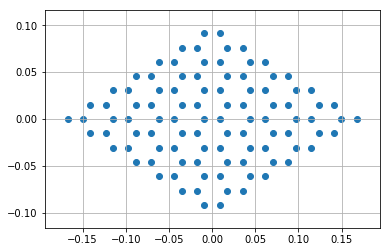

In [64]:
x = range(10)
y = range(10)

lat = a*np.array([[np.cos(np.pi/6), np.sin(np.pi/6)], [np.cos(np.pi/6), -np.sin(np.pi/6)]])
pos = np.array([lat[0] * i + lat[1]*j for i in range(-3,4) for j in range(-3,4)])
shift = (lat[0] + lat[1])/6
pos = np.concatenate([pos-shift, pos+shift])
plt.scatter(np.ravel(pos[:,0]), np.ravel(pos[:,1]))
plt.grid()
plt.show()

In [78]:
from mpl_toolkits.mplot3d import Axes3D

def func(psi, t, pos, rmax=1):
    def d(pos1, pos2):
        return np.linalg.norm(pos1 - pos2)

    dpsi_dt = omega_g2 * psi.copy()
    for i, dpsi in enumerate(dpsi_dt):
        for j in range(len(psi)):
            if d(pos[i], pos[j]) <= rmax:
                dpsi += omega_plus * (psi[i]-psi[j]) + omega_minus * np.exp(2j * theta[i,j]) * (psi[i].conjugate() - psi[j].conjugate())
    return dpsi_dt

t = np.arange(0, 100, 0.01)
n = 10
y0, t0 = np.array([0j]*len(pos)), 0.0
v = complex_ode(func).set_integrator('dopri5') 
v.set_initial_value(y0, t0).set_f_params(pos, a)
t1 = 10
dt = 1

while v.successful() and v.t < t1:
    print(v.t+dt, v.integrate(v.t+dt))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(v[:, 0], v[:, 1], v[:, 2])
plt.show()

TypeError: 'float' object is not subscriptable

In [ ]:
%debug

> /Users/nagoyan/anaconda/envs/p3/lib/python3.5/site-packages/scipy/integrate/_ode.py(628)_wrap()
    626 
    627     def _wrap(self, t, y, *f_args):
--> 628         f = self.cf(*((t, y[::2] + 1j * y[1::2]) + f_args))
    629         # self.tmp is a real-valued array containing the interleaved
    630         # real and imaginary parts of f.

ipdb> pos
*** NameError: name 'pos' is not defined
ipdb> f_args
()
ipdb> y
0.0305
ipdb> t
array([[-0.16728724,  0.        ],
       [-0.14087347, -0.01525   ],
       [-0.11445969, -0.0305    ],
       [-0.08804592, -0.04575   ],
       [-0.06163214, -0.061     ],
       [-0.03521837, -0.07625   ],
       [-0.00880459, -0.0915    ],
       [-0.14087347,  0.01525   ],
       [-0.11445969,  0.        ],
       [-0.08804592, -0.01525   ],
       [-0.06163214, -0.0305    ],
       [-0.03521837, -0.04575   ],
       [-0.00880459, -0.061     ],
       [ 0.01760918, -0.07625   ],
       [-0.11445969,  0.0305    ],
       [-0.08804592,  0.01525   ],
    